In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import integrate

In [2]:
source_file_name = "thailand-vre-generation-load-and-net-load-profiles-during-a-high-demand-period (1).csv"
save_file_name = "Unit Solar Generation July 2019"

In [6]:
# Load IEA Generation Data
# Source: https://www.iea.org/data-and-statistics/charts/thailand-vre-generation-load-and-net-load-profiles-during-a-high-demand-period
iea_weekly_generation_profile_df = pd.read_csv(source_file_name)

# Find the average daily generation profile
columns_solar = [column for column in iea_weekly_generation_profile_df.columns if "Solar" in column]
DAYS_RECORDED = iea_weekly_generation_profile_df.shape[0] // 48
generation_profile_each_day = []
columns_new = ["Central", "Metropolitan", "Northern", "North-eastern", "Southern"]

for index_day in range(DAYS_RECORDED):
    generation_profile_each_day.append(
        iea_weekly_generation_profile_df[index_day * 48 : (index_day + 1) * 48].reset_index()[columns_solar]
    )

daily_generation_profile_df = pd.DataFrame(np.average(generation_profile_each_day, axis=0))
daily_generation_profile_df.columns = columns_new
daily_generation_profile_df["time"] = np.arange(0, 24, 0.5)

# Normalize the daily generation profile
daily_generation_profile_normalized_df = pd.DataFrame(daily_generation_profile_df["time"])

for column in columns_new:
    area = integrate.trapezoid(daily_generation_profile_df[column], daily_generation_profile_df["time"])
    daily_generation_profile_normalized_df[column] = daily_generation_profile_df[column]/area

Text(0, 0.5, 'Power Density')

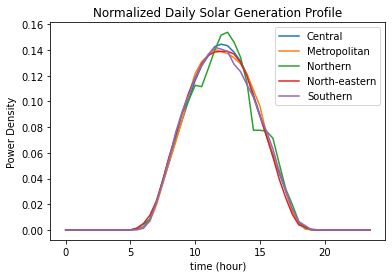

In [7]:
for column in columns_new:
    plt.plot(daily_generation_profile_normalized_df["time"], daily_generation_profile_normalized_df[column], label=column)

plt.legend()
plt.title("Normalized Daily Solar Generation Profile")
plt.xlabel("time (hour)")
plt.ylabel("Power Density")

In [8]:
daily_generation_profile_normalized_df.to_csv(save_file_name, index=False)